In [1]:
import numpy as np # linear algebra
import pandas as pd # data framing/mining , data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

# Classifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

In [2]:
# Importing data from csv files with pandas :
train_set = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")

In [3]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


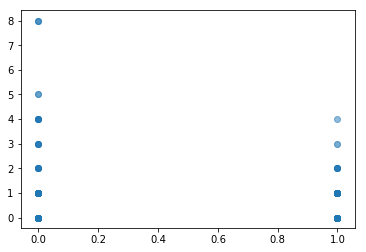

In [130]:
plt.scatter(train_set.Survived , train_set.SibSp , alpha=0.2)
plt.show()

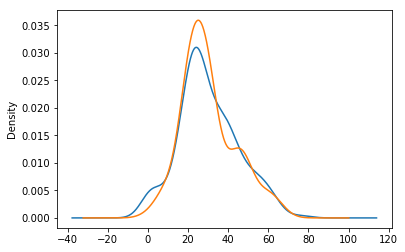

In [131]:
for x in [0,1] :
    test_set.Age[train_set.Survived == x].plot(kind = "kde")
plt.show()

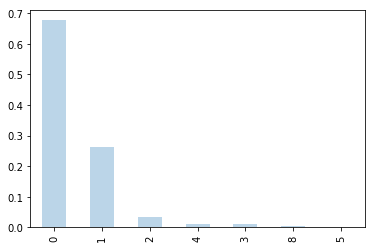

In [132]:
test_set.SibSp.value_counts(normalize=True).plot(kind="bar" , alpha = 0.3)
plt.show()

In [133]:
#train_set['Title'] = train_set['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

In [134]:
#Drop features we are not going to use
train_set = train_set.drop(['Name','SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1)
test_set = test_set.drop(['Name','SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1)

#Look at the first 3 rows of our training data
test_set.head(3)

,PassengerId,Pclass,Sex,Age
0,892,3,male,34.5
1,893,3,female,47.0
2,894,2,male,62.0


In [135]:
#Convert ['male','female'] to [1,0] so that our decision tree can be built
for df in [train_set,test_set]:
    df['Sex_binary']=df['Sex'].map({'male':1,'female':0})
    
#Fill in missing age values with 0 (presuming they are a baby if they do not have a listed age)
train_set['Age'] = train_set['Age'].fillna(0)
test_set['Age'] = test_set['Age'].fillna(0)

#Select feature column names and target variable we are going to use for training
features = ['Pclass','Age','Sex_binary']
target = 'Survived'

#Look at the first 3 rows (we have over 800 total rows) of our training data.; 
#This is input which our classifier will use as an input.

train_set[features].head(3)

,Pclass,Age,Sex_binary
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0


In [136]:
#Create classifier object with default hyperparameters
clf = RandomForestClassifier()  

#Fit our classifier using the training features and the training target values
clf.fit(train_set[features],train_set[target]) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [137]:
#Make predictions using the features from the test data set
predictions = clf.predict(test_set[features])
    

In [138]:
submission = pd.DataFrame({'PassengerId':test_set['PassengerId'],'Survived':predictions})


In [139]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'Titanic Predictions 1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions 1.csv
